In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
from sqlalchemy import create_engine
from urllib.parse import quote_plus
from dotenv import load_dotenv
import os
import json

In [2]:
df = pd.read_csv('spotify_sounds_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   track_name    210 non-null    object 
 1   album         210 non-null    object 
 2   artist        210 non-null    object 
 3   popularity    210 non-null    int64  
 4   duration_min  210 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 8.3+ KB


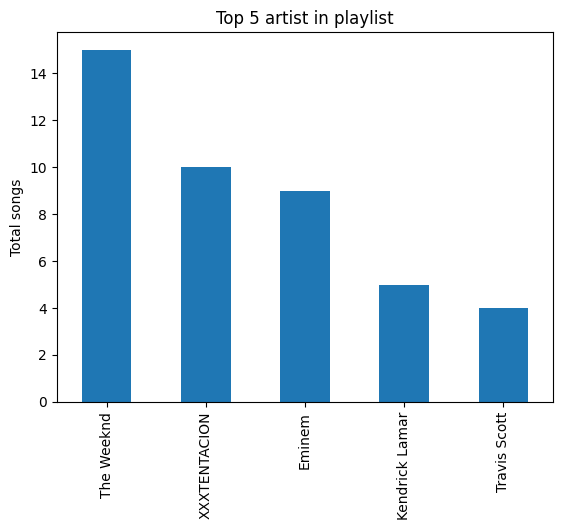

In [7]:
# 1 Artist with Maximum Songs

df['artist'].value_counts().head(5).plot(kind='bar')
plt.title('Top 5 artist in playlist')
plt.ylabel('Total songs')
plt.xlabel('')
plt.savefig('charts/top_5_artist.png', dpi = 300, bbox_inches = 'tight')
plt.show()

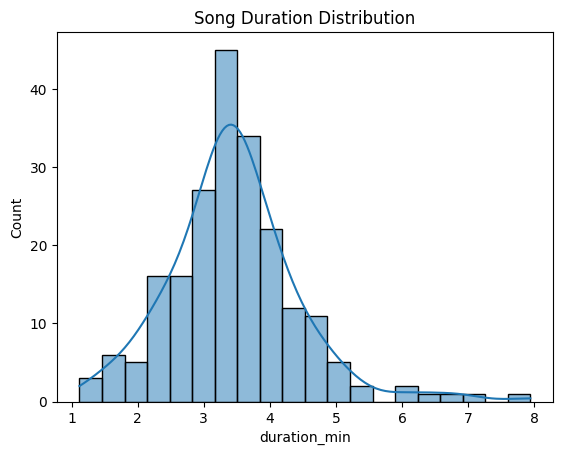

In [9]:
# 2 Distribution of Song Duration
sns.histplot(df['duration_min'], kde=True)
plt.title("Song Duration Distribution")
plt.savefig('charts/song_duration_distribution.png', dpi = 300, bbox_inches = 'tight')
plt.show()


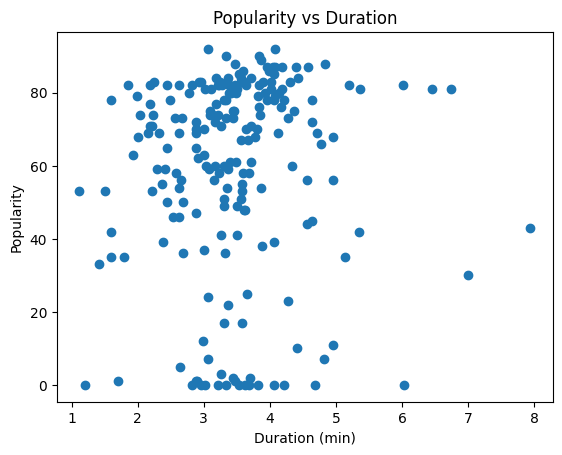

In [11]:
# 3 Popularity vs Duration Scatter Plot
plt.scatter(df['duration_min'], df['popularity'])
plt.xlabel("Duration (min)")
plt.ylabel("Popularity")
plt.title("Popularity vs Duration")
plt.savefig('charts/popularity_vs_duration.png', dpi = 300, bbox_inches = 'tight')
plt.show()


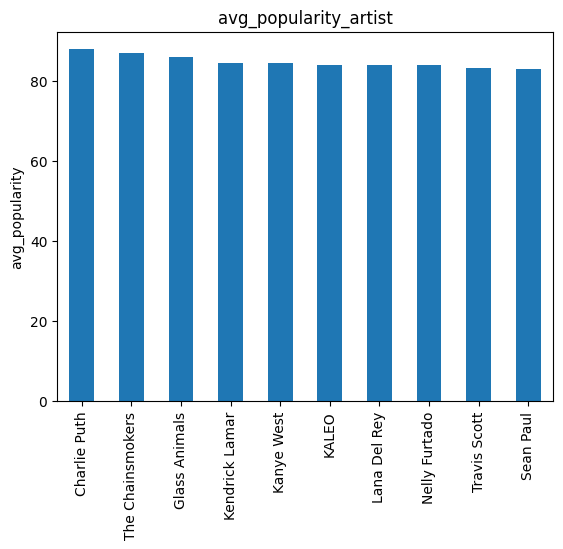

In [14]:
# 4 Average Popularity per Artist (Top 10)

avg_pop = df.groupby('artist')['popularity'].mean().sort_values(ascending=False).head(10)
avg_pop.plot(kind='bar', x = avg_pop.values ,y = avg_pop.index )
plt.xlabel('')
plt.ylabel("avg_popularity")
plt.title("avg_popularity_artist")
plt.savefig('charts/avg_popularity_artist.png', dpi = 300, bbox_inches = 'tight')
plt.show()

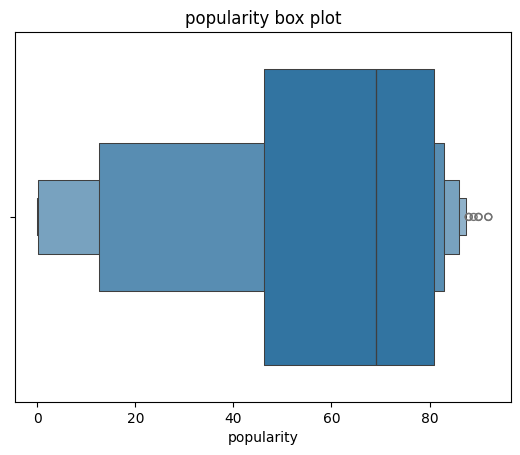

In [18]:
# 5 Boxplot – Popularity Distribution

sns.boxenplot(x =df['popularity'])
plt.ylabel('')
plt.title("popularity box plot")
plt.savefig('charts/popularity_box_plot.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [20]:
# 6 Find Outliers in Duration
Q1 = df['duration_min'].quantile(0.25)
Q3 = df['duration_min'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['duration_min'] < Q1 - 1.5*IQR) | (df['duration_min'] > Q3 + 1.5*IQR)]
outliers



,track_name,album,artist,popularity,duration_min
10,After Hours,After Hours,The Weeknd,82,6.02
42,After Hours,After Hours,The Weeknd,0,6.03
75,I. The Itis,Lucid,Piff Marti,0,1.21
85,Money Trees,"good kid, m.A.A.d city",Kendrick Lamar,81,6.45
124,Stan,The Marshall Mathers LP,Eminem,81,6.74
148,Ceremony,"Body Language, Vol. 24",Monkey Safari,30,7.00
192,In The Dark,"The Occult Series, Vol. 2",Bleed The Wicked Menace,53,1.12
195,Father Ocean - Ben Böhmer Remix,Father Ocean,Monolink,43,7.94


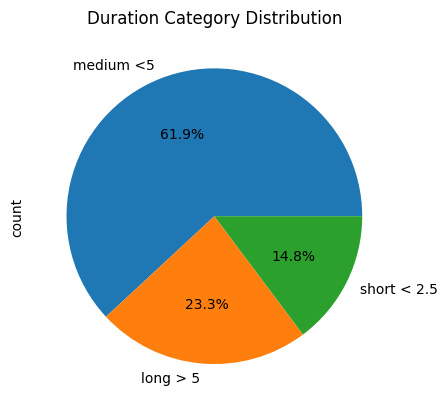

In [23]:
# 7 Pie Chart – Category of Duration (Short / Medium / Long)

def duration_cat(time):
    if time < 2.5:
        return 'short < 2.5'
    elif 2.5 < time < 4:
        return 'medium <5'
    else:
        return 'long > 5'


df['duration_category'] = df['duration_min'].apply(duration_cat)
df['duration_category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Duration Category Distribution")
plt.savefig('charts/duration_types.png', dpi = 300, bbox_inches= 'tight')
plt.show()


In [24]:
# 8 ML – Predict Popularity using Duration
from sklearn.linear_model import LinearRegression
X = df[['duration_min']]
y = df['popularity']
model = LinearRegression().fit(X, y)
print("R² Score:", model.score(X, y))


R² Score: 0.001632372902287349
